In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

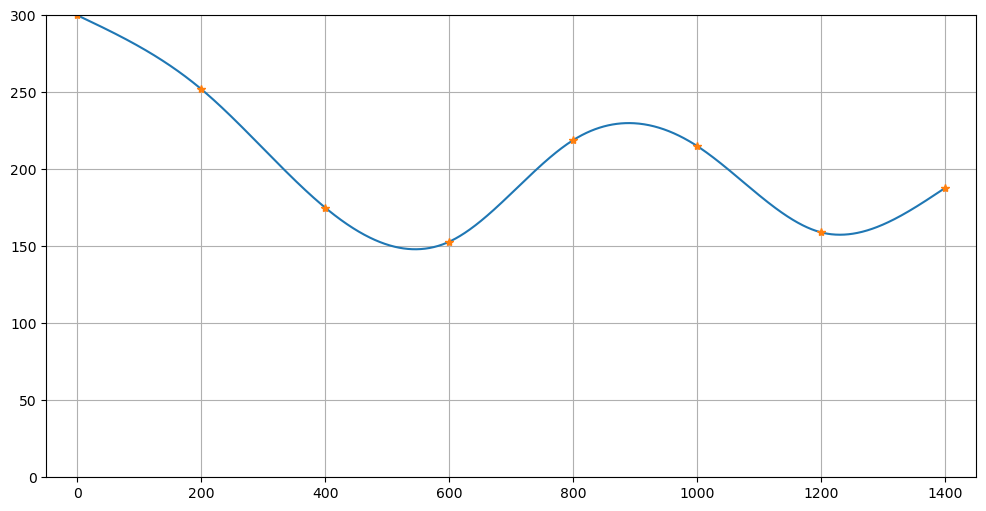

In [29]:
g = 9.81 * 10**3
c = 2/5
dx = 1
x_max = 1401
h = 200

xfast=np.asarray([0,1,2,3,4,5,6,7])*h
yfast = np.asarray([300, 252, 175, 153, 219, 215, 159, 188])
spline = CubicSpline(xfast, yfast, bc_type='natural')

x = np.arange(0, x_max, dx)
y = spline(x) # Viktig


baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x, y, xfast, yfast, '*')
plt.ylim(0, 300)
plt.xlim(-50, 1450)
plt.grid()
plt.show()

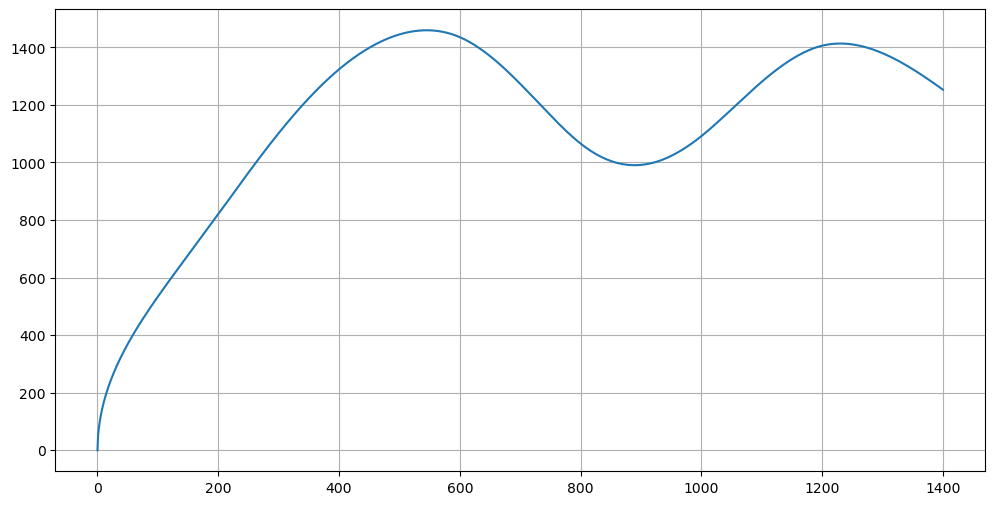

In [35]:
v = lambda x: np.sqrt((2 * g * (y[0] - y[x])) / (1 + c))

baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x, v(x), '-')
plt.grid()
plt.show()

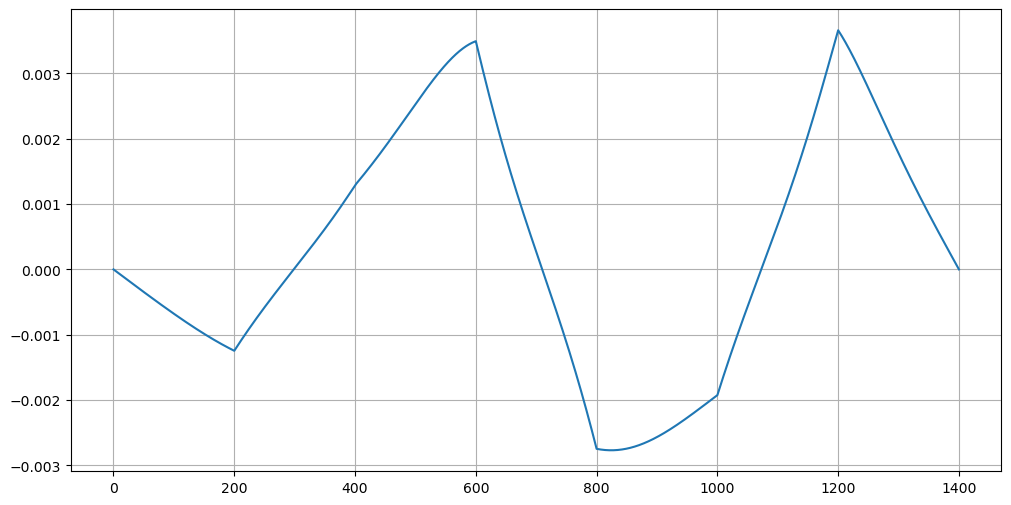

In [38]:
# Krumning
d2y = spline(x, 2)

krumning = lambda x: d2y[x] / (1 + dy[x]**2)**(3/2)

baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x, krumning(x), '-')
plt.grid()
plt.show()

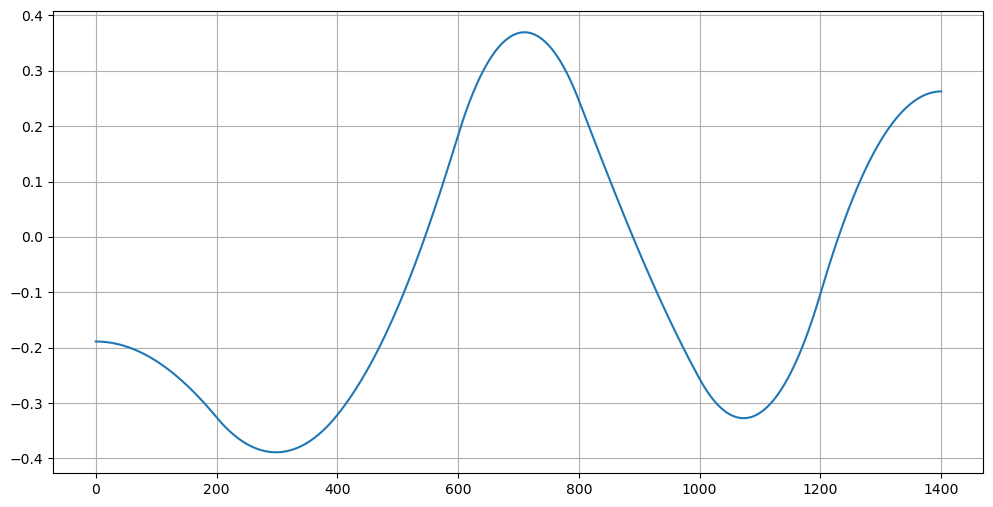

In [37]:
# Helningsvinkel

dy = spline(x, 1)
beta = lambda x: np.arctan(dy[x])

baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x, beta(x), '-')
plt.grid()
plt.show()

In [32]:
v_x = lambda x: v(x) * np.cos(beta(x))
dx = 1
v_x0 = 0

delta_t = lambda n: 2*dx / (v_x(n) + v_x(n+1))

t = 0
for n in range(0, 1400):
    t += delta_t(n)

print(t)
    

1.570783650023306


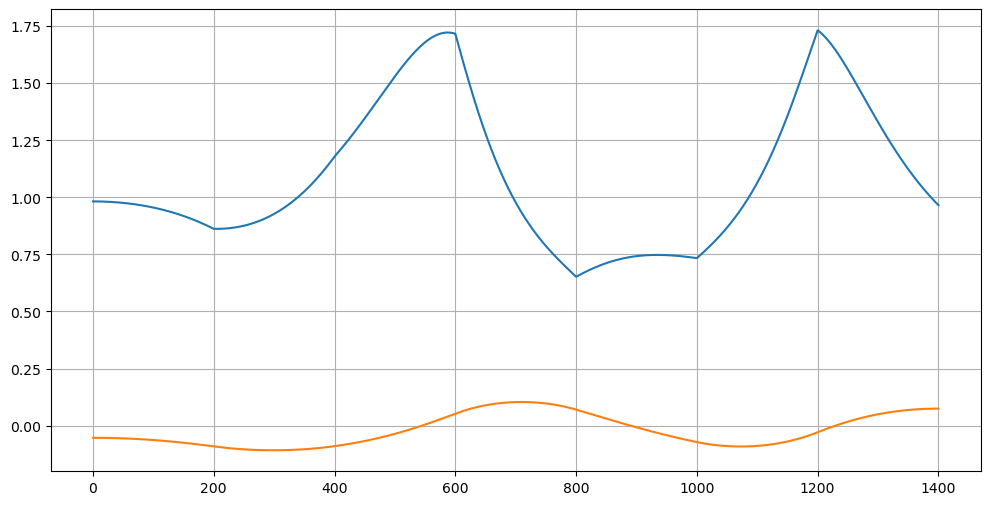

In [45]:
m = 31 * 10**(-3) # Gram!
r = 11 # mm!

a_c = lambda x: (v(x)**2) * krumning(x)

N = lambda x: m * (g * np.cos(beta(x)) + a_c(x))

friksjon = lambda x: (c / (1 + c)) * m * g * np.sin(beta(x))

baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x, N(x) / (m*g), x, friksjon(x)/(m*g), '-')
plt.grid()
plt.show()

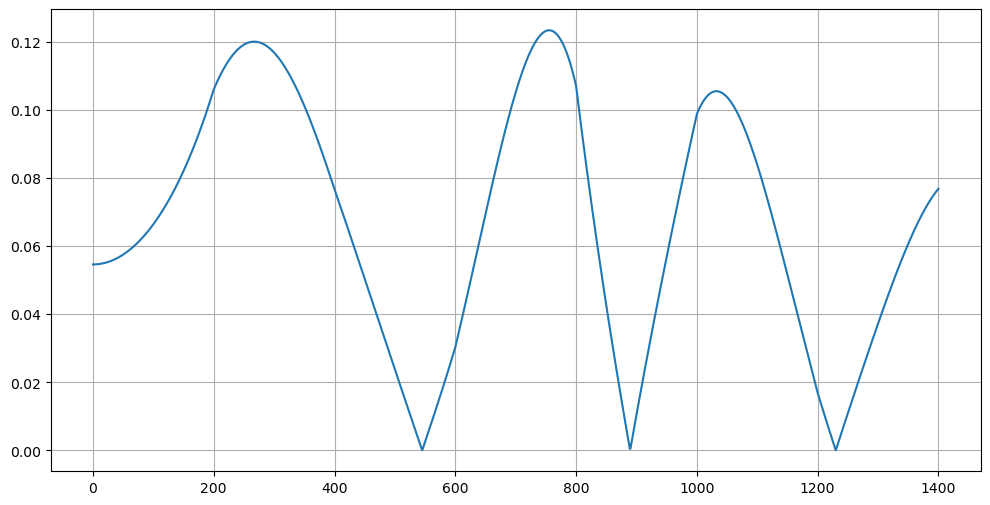

In [48]:
ratio = lambda x: abs(friksjon(x)) / abs(N(x))

baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x, ratio(x), '-')
plt.grid()
plt.show()